In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('https://covid.ourworldindata.org/data/ecdc/full_data.csv')
print(data.head())

         date     location  new_cases  new_deaths  total_cases  total_deaths
0  2019-12-31  Afghanistan          0           0            0             0
1  2020-01-01  Afghanistan          0           0            0             0
2  2020-01-02  Afghanistan          0           0            0             0
3  2020-01-03  Afghanistan          0           0            0             0
4  2020-01-04  Afghanistan          0           0            0             0


In [3]:
#Excluding all the data where total cases are less than 100 and world data
data100 = data[data["total_cases"]>99]
data100 = data100[data100["location"] != "World"]

In [4]:
#Converting whole data in the form of a table
datatable = data100.pivot_table(values= "total_cases",index = "date", columns= "location",fill_value = 0)

In [5]:
#To exclude data of countries where the total cases have not exceeded 1000
datatablet = datatable.T
datatablet = datatablet[datatablet["2020-03-29"]>900]
datatable = datatablet.T
datatable['World'] = datatable.sum(axis=1)
datatable.head()

location,Australia,Austria,Belgium,Brazil,Canada,Chile,China,Czech Republic,Denmark,Ecuador,...,South Africa,South Korea,Spain,Sweden,Switzerland,Thailand,Turkey,United Kingdom,United States,World
date,,,,,,,,,,,,,,,,,,,,,
2020-01-19,0,0,0,0,0,0,216,0,0,0,...,0,0,0,0,0,0,0,0,0,216
2020-01-20,0,0,0,0,0,0,235,0,0,0,...,0,0,0,0,0,0,0,0,0,235
2020-01-21,0,0,0,0,0,0,386,0,0,0,...,0,0,0,0,0,0,0,0,0,386
2020-01-22,0,0,0,0,0,0,526,0,0,0,...,0,0,0,0,0,0,0,0,0,526
2020-01-23,0,0,0,0,0,0,623,0,0,0,...,0,0,0,0,0,0,0,0,0,623


In [6]:
#Converting the data to see if there is exponential spread of virus after the total cases have reached 100 in a country
#To check if virus spread in india after the total cases reached 100 are is higher or lowercompared to other countries
x = 0
cnames = list(datatable.columns.values)

In [7]:
while cnames[x] != "World":
    while datatable.loc["2020-01-19"][cnames[x]] == 0:
        datatable[cnames[x]] = datatable[cnames[x]].shift(-1).fillna('')
    else:
        x = x+1
    
else :
    datatable.index = range(1,73)
    print("Taking day on which total count reached 100 as day 1 for all countries")

Taking day on which total count reached 100 as day 1 for all countries


In [8]:
#Just changing the column name - otherwise was unable to include in the graph
datatable = datatable.rename(columns={'United States': 'USA'})
datatable

location,Australia,Austria,Belgium,Brazil,Canada,Chile,China,Czech Republic,Denmark,Ecuador,...,South Africa,South Korea,Spain,Sweden,Switzerland,Thailand,Turkey,United Kingdom,USA,World
1,100,102,109,121,103,156,216,116,113,111,...,116,155,114,137,209,114,191,115,103,216
2,112,131,169,200,138,201,235,150,264,168,...,150,345,151,161,264,177,359,163,125,235
3,126,182,200,234,176,238,386,214,516,199,...,205,601,200,203,332,177,670,206,159,386
4,156,246,239,291,244,342,526,298,676,426,...,240,762,261,248,374,177,947,273,233,526
5,197,361,267,428,304,434,623,344,804,532,...,274,892,374,326,490,212,1236,321,338,623
6,249,504,314,621,424,537,882,434,827,789,...,402,1146,430,462,642,366,1529,373,433,882
7,298,655,399,904,569,632,1323,522,875,981,...,557,1595,589,620,854,599,1872,456,554,1323
8,375,860,559,1128,690,746,1988,694,932,1082,...,709,2022,1204,775,1121,721,2433,590,754,1988
9,454,1016,689,1546,846,922,2775,904,1024,1211,...,927,2931,1639,924,1359,827,3629,707,1025,2775
10,565,1332,886,1891,971,1142,4528,995,1115,1403,...,1170,3526,2140,1032,2200,934,5698,1140,1312,4528


In [9]:
datatable = datatable.apply(pd.to_numeric)
datatable = datatable[0:16]

Text(0,0.5,'Total Cases')

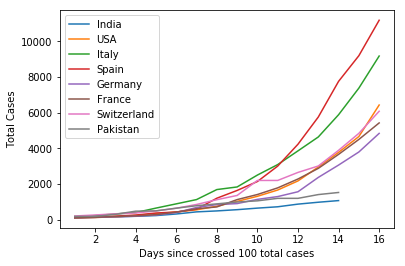

In [10]:
plt.plot(datatable.index, datatable.India, label = "India")
plt.plot(datatable.index, datatable.USA)
plt.plot(datatable.index, datatable.Italy)
plt.plot(datatable.index, datatable.Spain)
plt.plot(datatable.index, datatable.Germany)
plt.plot(datatable.index, datatable.France)
plt.plot(datatable.index, datatable.Switzerland)
plt.plot(datatable.index, datatable.Pakistan)
plt.legend()
plt.xlabel('Days since crossed 100 total cases')
plt.ylabel('Total Cases')

Text(0,0.5,'Total Cases')

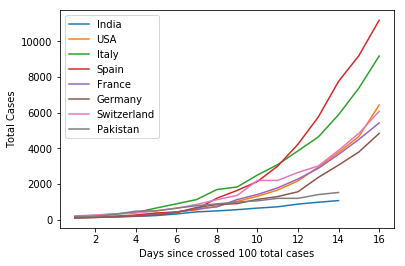

In [11]:
list = ["India","USA","Italy","Spain","France","Germany","Switzerland","Pakistan"]
for var in list:
    datatable[var].plot(kind="line")
plt.legend()
plt.xlabel('Days since crossed 100 total cases')
plt.ylabel('Total Cases')

In [ ]:
Conclusion??